***基礎套件匯入***

In [28]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

***讀取資料及資料合併與資料觀察***

In [29]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all_data = pd.concat([train,test],axis = 0)
print(all_data)

           ID  行政區    土地面積   建物總面積 都市土地使用分區    交易年月日     建築完成年月 移轉層次 總樓層數  \
0       46759  烏日區   22.78  172.74        商  1101226  1100621.0   三層  十四層   
1       69168  豐原區  172.18  188.86        商  1090212   650731.0    全   二層   
2       60602  北屯區   24.91  175.77        住  1090313  1100925.0   九層  十二層   
3      136756  豐原區   15.05  103.41        商  1041110  1060816.0   九層  十二層   
4       36267   南區   14.46   33.59        住  1110502   691231.0   四層   五層   
...       ...  ...     ...     ...      ...      ...        ...  ...  ...   
29995   19567   南區   33.14  241.10        住  1111004   811120.0  十一層  十四層   
29996   43441  北屯區   28.15  232.41        住  1081015  1110112.0   二層  十五層   
29997   48392  大雅區   28.92  111.59        住  1101112  1030226.0   六層   七層   
29998   73740   南區    8.31  107.22        商  1081017   880208.0   十層  十四層   
29999    1868  西屯區   22.21  205.10        住  1051031    0821214   七層  十四層   

                  建物型態  ...       用途 房數  廳數  衛數  隔間 有無管理組織  車位類別 車位移轉總面積  \

In [30]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156966 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        156966 non-null  int64  
 1   行政區       156966 non-null  object 
 2   土地面積      156966 non-null  float64
 3   建物總面積     156966 non-null  float64
 4   都市土地使用分區  156966 non-null  object 
 5   交易年月日     156966 non-null  int64  
 6   建築完成年月    156210 non-null  object 
 7   移轉層次      156241 non-null  object 
 8   總樓層數      156831 non-null  object 
 9   建物型態      156966 non-null  object 
 10  主要建材      156842 non-null  object 
 11  用途        156788 non-null  object 
 12  房數        156966 non-null  int64  
 13  廳數        156966 non-null  int64  
 14  衛數        156966 non-null  int64  
 15  隔間        156966 non-null  object 
 16  有無管理組織    156966 non-null  object 
 17  車位類別      92452 non-null   object 
 18  車位移轉總面積   145978 non-null  float64
 19  車位總價      156966 non-null  float64
 20  總價        

***遺漏值觀察***

In [31]:
missing_value = all_data.isnull().sum()
missing_value

ID              0
行政區             0
土地面積            0
建物總面積           0
都市土地使用分區        0
交易年月日           0
建築完成年月        756
移轉層次          725
總樓層數          135
建物型態            0
主要建材          124
用途            178
房數              0
廳數              0
衛數              0
隔間              0
有無管理組織          0
車位類別        64514
車位移轉總面積     10988
車位總價            0
總價          30000
dtype: int64

***刪除非必要特徵***

In [32]:
all_data = all_data.drop(columns=['總價','ID','車位類別'])
train = train.drop(columns=['ID','車位類別'])
test = test.drop(columns=['ID','車位類別'])

***類別型特徵與數值型特徵分離***

In [33]:
features = all_data.columns

categorical_cols = []
numerical_cols = []

for i in features:
    if all_data[i].dtype == 'object':
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)
print(categorical_cols)
print(numerical_cols)

['行政區', '都市土地使用分區', '建築完成年月', '移轉層次', '總樓層數', '建物型態', '主要建材', '用途', '隔間', '有無管理組織']
['土地面積', '建物總面積', '交易年月日', '房數', '廳數', '衛數', '車位移轉總面積', '車位總價']


In [34]:
test = test.replace('066  25',np.nan)
test = test.replace('---',np.nan)

***針對建築完成年月做數據前處理***

In [35]:
all_data['建築完成年月'] = all_data['建築完成年月'].astype(str).str.replace(r'\D', '', regex=True)
all_data['建築完成年月'] = pd.to_numeric(all_data['建築完成年月'], errors='coerce')


median = all_data['建築完成年月'].median()
all_data['建築完成年月'].fillna(median, inplace=True)

missing_building_year = all_data['建築完成年月'].isnull().sum()

missing_building_year


0

***總樓層數數據觀察***

In [36]:
all_data['總樓層數'].unique()

array(['十四層', '二層', '十二層', '五層', '二十五層', '三十二層', '三層', '二十四層', '十五層',
       '二十層', '二十二層', '七層', '十八層', '四層', '十六層', '二十六層', '二十一層', '十九層',
       '二十三層', '十一層', '九層', '二十九層', '十層', '十三層', '八層', '十七層', '一層',
       '二十七層', '二十八層', '六層', '三十五層', '三十八層', nan, '三十層', '三十九層', '四十一層',
       '四十二層', '三十四層', '三十三層', '三十七層', '三十一層', '(空白)', '三十六層', '見其他登記事項'],
      dtype=object)

***針對總樓層數做數據前處理***

In [37]:
import re
def chinese_to_arabic(cn):
    numerals = {
        '零': 0, '一': 1, '二': 2, '三': 3, '四': 4,
        '五': 5, '六': 6, '七': 7, '八': 8, '九': 9,
        '十': 10
    }
    
    if cn in numerals:
        return numerals[cn]
    
    if '十' in cn:
        if cn.index('十') == 0:
            return 10 + numerals.get(cn[1], 0)
        else:
            return numerals[cn[0]] * 10 + numerals.get(cn[2], 0)
    return None

all_data['總樓層數'] = all_data['總樓層數'].replace(['(空白)','見其他登記事項',np.nan],'無')
all_data['總樓層數'] = all_data['總樓層數'].astype(str).apply(lambda x: chinese_to_arabic(x) if re.search('[\u4e00-\u9fa5]', x) else x)
all_data['總樓層數'] = pd.to_numeric(all_data['總樓層數'], errors='coerce')

train['總樓層數'] = train['總樓層數'].astype(str).apply(lambda x: chinese_to_arabic(x) if re.search('[\u4e00-\u9fa5]', x) else x)
train['總樓層數'] = pd.to_numeric(train['總樓層數'], errors='coerce')

test['總樓層數'] = test['總樓層數'].astype(str).apply(lambda x: chinese_to_arabic(x) if re.search('[\u4e00-\u9fa5]', x) else x)
test['總樓層數'] = pd.to_numeric(test['總樓層數'], errors='coerce')

#categorical_cols.remove('總樓層數')
#numerical_cols.append('總樓層數')

In [38]:
all_data['總樓層數']

0        14.0
1         NaN
2        12.0
3        12.0
4         NaN
         ... 
29995    14.0
29996    15.0
29997     NaN
29998    14.0
29999    14.0
Name: 總樓層數, Length: 156966, dtype: float64

***都市土地使用分區數據觀察***

In [39]:
all_data['都市土地使用分區'].unique()

array(['商', '住', '其他'], dtype=object)

***移轉層次數據觀察***

In [40]:
all_data['移轉層次'].unique()

array(['三層', '全', '九層', '四層', '八層', '三十層', '十二層', '五層', '六層', '七層', '十一層',
       '二十四層', '十四層', '一層，騎樓，夾層', '十五層', '十七層', '二層', '十層',
       '一層，二層，騎樓，夾層，地下一層', '十三層', '十八層', '二十層', '五層，六層', '十九層', '十六層',
       '一層，騎樓', '一層，二層，騎樓', '一層，二層', '二十二層', nan, '一層，二層，三層', '二十一層',
       '十四層，十五層，十六層', '一層，見其他登記事項', '一層', '十三層，十四層', '二十六層', '二層，電梯樓梯間',
       '七層，八層', '三十一層', '二十三層', '一層，騎樓，地下層', '二十三層，二十四層，二十五層', '二層，三層',
       '二十五層', '一層，二層，三層，地下一層，見其他登記事項', '二十八層', '地下層',
       '一層，二層，三層，四層，見其他登記事項', '一層，地下層', '一層，二層，三層，騎樓，見其他登記事項', '二十九層',
       '十五層，十六層', '八層，夾層', '地下一層', '九層，十層', '十九層，二十層', '二十七層',
       '二十一層，二十二層', '一層，二層，三層，屋頂突出物，地下層', '十二層，十三層', '五層，見其他登記事項',
       '二十五層，二十六層', '八層，九層', '一層，二層，騎樓，地下層', '一層，二層，夾層，見其他登記事項',
       '十七層，十八層', '二層，見其他登記事項', '一層，騎樓，夾層，地下層', '六層，七層', '一層，地下一層',
       '一層，二層，三層，騎樓，地下一層，見其他登記事項', '一層，二層，騎樓，夾層', '十六層，十七層', '一層，夾層',
       '一層，二層，三層，騎樓', '十二層，見其他登記事項', '三十九層', '十四層，十五層', '二層，陽台',
       '夾層，地下一層', '一層，夾層，地下層', '十九層，見其他登記事項', '十層，十一層',

***針對移轉層次做數據前處理***

In [41]:
#all_data['移轉層次'] = all_data['移轉層次'].replace('見其他登記事項', '無')
#all_data['移轉層次'] = all_data['移轉層次'].str.replace('見其他登記事項', '')
#all_data['移轉層次'].unique()

#train['移轉層次'] = train['移轉層次'].replace('見其他登記事項', '無')
#train['移轉層次'] = train['移轉層次'].str.replace('見其他登記事項', '')

#test['移轉層次'] = test['移轉層次'].replace('見其他登記事項', '無')
#test['移轉層次'] = test['移轉層次'].str.replace('見其他登記事項', '')

***建物型態數據觀察***

In [42]:
all_data['建物型態'].unique()

array(['住宅大樓(11層含以上有電梯)', '透天厝', '公寓(5樓含以下無電梯)', '華廈(10層含以下有電梯)',
       '套房(1房1廳1衛)'], dtype=object)

***用途數據觀察***

In [43]:
all_data['用途'].unique()

array(['住家用', '見其他登記事項', '住商用', '見其它登記事項', '其他', '商業用', '工商用', nan, '辦公用',
       '國民住宅', '商辦用', '住工用', '工業用', '住商辦用', '住宅、住宅附屬停車空間、樓梯間、電梯間',
       '見使用執照', '農舍', '住宅、停車空間、樓梯間', '農業用'], dtype=object)

***針對用途進行數據前處理***

In [44]:
#all_data['用途'] = all_data['用途'].replace(['見其他登記事項','見其它登記事項','其他','見使用執照'],'無')

#train['用途'] = train['用途'].replace(['見其他登記事項','見其它登記事項','其他','見使用執照'],'無')

#test['用途'] = test['用途'].replace(['見其他登記事項','見其它登記事項','其他','見使用執照'],'無')

***有無管理組織數據觀察***

In [45]:
all_data['有無管理組織'].unique()

array(['有', '無'], dtype=object)

***行政區數據觀察***

In [46]:
all_data['行政區'].unique()

array(['烏日區', '豐原區', '北屯區', '南區', '北區', '沙鹿區', '南屯區', '東區', '西屯區', '大里區',
       '大雅區', '西區', '神岡區', '潭子區', '大肚區', '中區'], dtype=object)

***主要建材數據觀察***

In [47]:
all_data['主要建材'].unique()

array(['鋼筋混凝土造', '加強磚造', '鋼筋混凝土加強磚造', '見其他登記事項', '鋼骨鋼筋混凝土造', '磚造', 'ＲＣ造',
       '鐵筋加強磚造', '見其它登記事項', '鋼骨混凝土造', '鋼骨造', 'RC構造', '磚造瓦頂', nan,
       '磨石地床、水泥平頂、加強磚造', '木造', '鋼架造', '土造', '鋼骨鋼筋混凝土造、鋼筋混凝土造', '鐵筋磚造蓋瓦頂',
       '鋼造', 'ＲＣ鋼筋混凝土造', '加強磚造\u3000鋼架造', '鋼骨鋼筋混凝土造，鋼筋混凝土造，鋼骨造',
       '鐵架無壁石棉浪板頂、水泥地床', '\ueed5筋加強磚造', '加強磚造、水泥平頂、磨石地床、二層水泥地床', '鐵筋混凝土造',
       '煉瓦木混', '水泥平頂、加強磚造、磨石地床', '鋼構鋼筋混凝土造', 'RC造', '鐵筋磚造', '鐵筋加強磚',
       '磚造、瓦頂、水泥地床造', '木石磚造', '加強磚造、鋼骨造', '鋼筋混凝土造、木造', 'ＲＣ加磚', '鐵造',
       '水泥平頂、磨石地床、加強磚造', '鐵筋磚造蓋水泥', '鐵筋磚造水泥頂', '預力混凝土造', '鋼鐵造', '鋼架構造',
       'ＲＣ及加磚', '加強磚造、瓦頂、磨石地床', '鐵筋加強磚造蓋瓦頂', '鋼骨ＲＣ造', '鋼骨', '磚造及磚木造蓋瓦頂',
       '磚木造', '加強磚造、水泥平頂、磨石地床、水泥地床', '鋼筋混凝土造\u3000構架造', '加強磚造、水泥平頂、磨石地床',
       '加強磚造．鋼筋混凝土造', '鋼骨造、鋼筋混凝土造', '磚造、水泥瓦頂、磨石地床', '鋼構造', '雜木造',
       '加強\ueed5筋磚造', '加強磚造、水泥平頂、水泥地床、磨石地床', '磨石地床、加強磚造、水泥平頂',
       '鋼筋混凝土造\u3000鋼架造', '土磚石混合造', '磚造蓋瓦頂', '土竹造（純土造）',
       '鋼磚地床、磨石地床、水泥平頂、加強磚造', '鋼鐵造（有牆）', '鋼筋混凝土、加強磚造', '鐵筋磚造水泥平頂',
       '鋼筋混凝土造、鋼鐵造', '鋼架造有牆', '石造', 

***隔間數據觀察***

In [48]:
all_data['隔間'].unique()

array(['有', '無'], dtype=object)

***離群值處理***

In [49]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
for col in numerical_cols:
    all_data = remove_outliers(all_data,i)
    train = remove_outliers(train,i)

***探索式分析***

C:\Users\blade\AppData\Local\Temp\ipykernel_24124\1134062110.py:6: UserWarning: Glyph 22303 (\N{CJK UNIFIED IDEOGRAPH-571F}) missing from current font.
  plt.tight_layout()
C:\Users\blade\AppData\Local\Temp\ipykernel_24124\1134062110.py:6: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  plt.tight_layout()
C:\Users\blade\AppData\Local\Temp\ipykernel_24124\1134062110.py:6: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  plt.tight_layout()
C:\Users\blade\AppData\Local\Temp\ipykernel_24124\1134062110.py:6: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  plt.tight_layout()
C:\Users\blade\AppData\Local\Temp\ipykernel_24124\1134062110.py:6: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from current font.
  plt.tight_layout()
C:\Users\blade\AppData\Local\Temp\ipykernel_24124\1134062110.py:6: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing fr

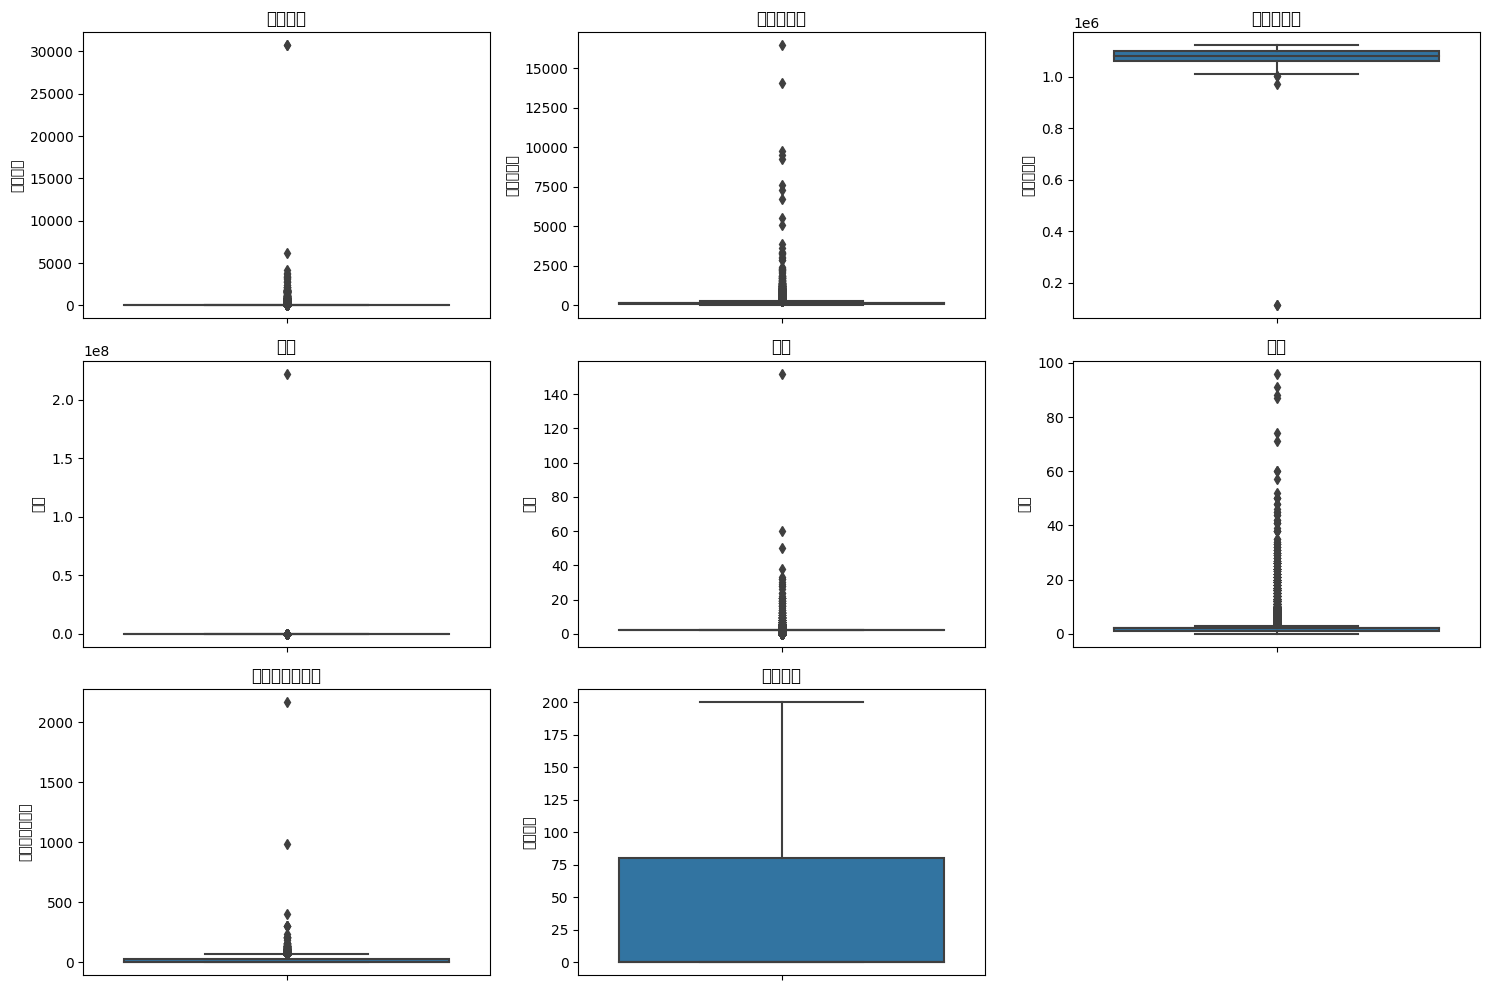

In [50]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=train[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

***相關係數觀察***

c:\Users\blade\anaconda3\envs\DL\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 22303 (\N{CJK UNIFIED IDEOGRAPH-571F}) missing from current font.
  fig.canvas.draw()
c:\Users\blade\anaconda3\envs\DL\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 22320 (\N{CJK UNIFIED IDEOGRAPH-5730}) missing from current font.
  fig.canvas.draw()
c:\Users\blade\anaconda3\envs\DL\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  fig.canvas.draw()
c:\Users\blade\anaconda3\envs\DL\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  fig.canvas.draw()
c:\Users\blade\anaconda3\envs\DL\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from current font.
  fig.canvas.draw()
c:\Users\blade\anaconda3\envs\DL\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 29289 (\N{CJK UNIFIED ID

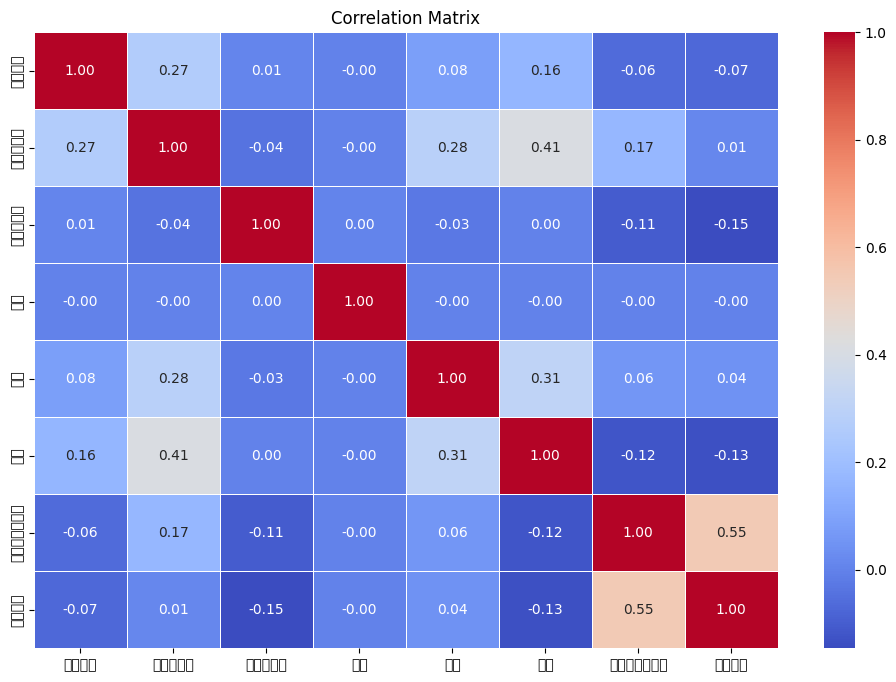

In [51]:
corr = all_data[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [52]:
all_data['車位移轉總面積'].fillna(0,inplace = True)
train['車位移轉總面積'].fillna(0,inplace = True)
test['車位移轉總面積'].fillna(0,inplace = True)

***遺漏值填補及數據轉換***

In [53]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,train_test_split
from xgboost import XGBRegressor
y = train['總價']
train = train.drop(columns='總價')
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('StandScaler',StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_cols),
        ('cat',categorical_transformer,categorical_cols)
    ])
preprocessor.fit(all_data)

train = preprocessor.transform(train)
test = preprocessor.transform(test)


In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, random_state=42,n_jobs= -1)
rf.fit(train,y)

y_pred_rf = rf.predict(test)

***檢查輸入型態***

In [55]:
print(train.shape)
print(test.shape)

(119404, 13033)
(30000, 13033)


***建模***

In [56]:
model = XGBRegressor(n_estimators=10000)

model.fit(train, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

***輸出預測結果***

In [57]:
y_pred_xgb = model.predict(test)

In [59]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators=10000,n_jobs=-1,reg_lambda=1)

lgb.fit(train,y)

y_pred_lgb = lgb.predict(test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3668
[LightGBM] [Info] Number of data points in the train set: 119404, number of used features: 1208
[LightGBM] [Info] Start training from score 1063.156427


***預測結果CSV檔輸出***

In [60]:
sample = pd.read_csv('sample.csv')
sample['總價'] = (y_pred_xgb + y_pred_rf+y_pred_lgb)/3
sample.to_csv('Last',index = False)